# 4.5. Weight Decay

## 4.5.2. High-Dimensional Linear Regression


In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
n_train, n_test, num_inputs, batch_size = 20,100, 200, 5
true_w, true_b = torch.ones((num_inputs,1))*0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

## 4.5.3.1. Initializing Model Parameters


In [13]:
def init_params():
  w = torch.normal(0,1, size=(num_inputs, 1), requires_grad = True)
  b = torch.zeros(1, requires_grad=True)
  return [w,b]

## 4.5.3.2. Defining  𝐿2  Norm Penalty

In [14]:
def l2_penalty(w):
  return torch.sum(w.pow(2))/2

## 4.5.3.3. Defining the Training Loop


In [15]:
def train(lambd):
  w,b = init_params()
  net,loss = lambda X: d2l.linreg(X,w,b), d2l.squared_loss
  num_epochs, lr = 100, 0.003
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
  for epoch in range(num_epochs):
    for X,y in train_iter:
      l = loss(net(X),y) + lambd * l2_penalty(w)
      l.sum().backward()
      d2l.sgd([w,b], lr, batch_size)
    if (epoch + 1)% 5 == 0:
      animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())


## 4.5.3.4. Training without Regularization¶


L2 norm of w: 13.512696266174316


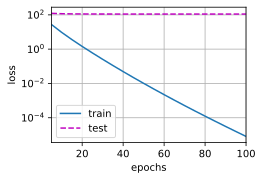

In [16]:
train(lambd=0)

## 4.5.3.5. Using Weight Decay


L2 norm of w: 0.34809377789497375


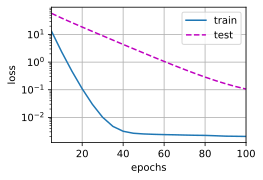

In [17]:
train(lambd=3)

## 4.5.4. Concise Implementation


In [20]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

L2 norm of w: 12.641465187072754


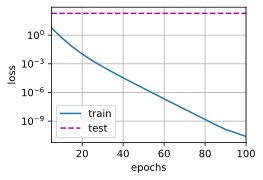

In [21]:
train_concise(0)

L2 norm of w: 0.37534740567207336


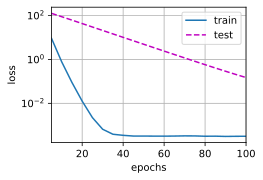

In [22]:
train_concise(3)